In [197]:
# Importar las librerías necesarias
import pandas as pd
import plotly.express as px

# Cargar el archivo CSV (asegúrate de que esté en la raíz del proyecto)
df = pd.read_csv('../vehicles_us.csv')

# Mostrar las primeras filas
df.head()


df = pd.read_csv('../vehicles_us.csv')
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [198]:
# Ver información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [199]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Identificar y eliminar valores atípicos en price
Primero revisamos el rango razonable:

In [200]:
# Ver el rango de precios
df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Luego eliminamos los que están fuera de un rango lógico (por ejemplo, menor a 100 o mayor a 100,000):

In [201]:
# Eliminar precios fuera de un rango lógico
df = df[(df['price'] >= 100) & (df['price'] <= 100000)]

# Confirmar los cambios
df['price'].describe()

count    50645.000000
mean     12284.266502
std       9462.595401
min        105.000000
25%       5300.000000
50%       9495.000000
75%      16925.000000
max      94955.000000
Name: price, dtype: float64

### Limpiar la columna model_year
Esta columna tiene valores faltantes (NaN). Vamos a ver cuántos hay y luego rellenarlos de forma razonable.

In [202]:
#Revisar valores faltantes
df['model_year'].isna().sum()

np.int64(3562)

In [203]:
#Rellenar con el año más frecuente (moda)
most_common_year = df['model_year'].mode()[0]
most_common_year

np.float64(2013.0)

In [204]:
#Rellenar los valores faltantes
df['model_year'] = df['model_year'].fillna(most_common_year)

In [205]:
#Confirmar que ya no hay NaN
df['model_year'].isna().sum()

np.int64(0)

In [206]:
# Revisar valores únicos de columnas importantes
print(df['model_year'].unique())
print(df['cylinders'].unique())
print(df['odometer'].unique())
print(df['is_4wd'].unique())

[2011. 2013. 2003. 2017. 2014. 2015. 2012. 2008. 2018. 2009. 2010. 2007.
 2004. 2005. 2001. 2006. 1966. 1994. 2019. 2000. 2016. 1993. 1999. 1997.
 2002. 1981. 1995. 1996. 1975. 1998. 1985. 1977. 1987. 1974. 1990. 1992.
 1991. 1972. 1967. 1988. 1969. 1989. 1978. 1965. 1979. 1968. 1986. 1980.
 1964. 1963. 1984. 1982. 1973. 1970. 1955. 1971. 1976. 1983. 1954. 1962.
 1948. 1960. 1908. 1961. 1936. 1949. 1958. 1929.]
[ 6.  4.  8. nan  5. 10.  3. 12.]
[145000.  88705. 110000. ... 121778. 181500. 139573.]
[ 1. nan]


In [207]:
# Ver cuántos valores faltan por columna
print(df.isna().sum())

price               0
model_year          0
model               0
condition           0
cylinders        5180
fuel                0
odometer         7749
transmission        0
type                0
paint_color      9095
is_4wd          25768
date_posted         0
days_listed         0
dtype: int64


In [208]:
# Rellenar los NaN en is_4wd con 0, ya que probablemente son autos sin tracción en las 4 ruedas
df['is_4wd'] = df['is_4wd'].fillna(0)

In [209]:
# Eliminar filas con valores nulos en model_year o cylinders
df = df.dropna(subset=['model_year', 'cylinders'])

In [210]:
# Rellenar odometer con la mediana (mejor que el promedio por los valores extremos)
df['odometer'] = df['odometer'].fillna(df['odometer'].median())


In [211]:
# Donde no se conoce el color, lo marcamos como 'unknown'
df['paint_color'] = df['paint_color'].fillna('unknown')

In [212]:
# Verificar nuevamente si hay valores faltantes
print(df.isna().sum())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


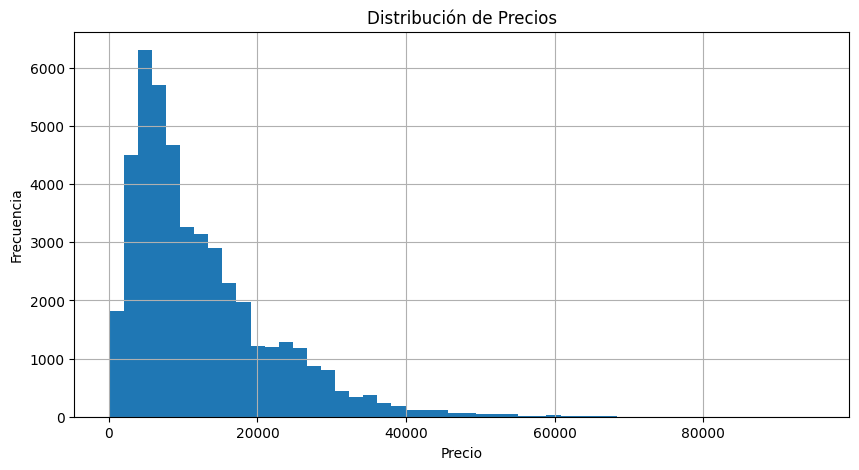

In [213]:
import matplotlib.pyplot as plt

# Crear histograma del precio
df['price'].hist(bins=50, figsize=(10, 5))
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Distribución de precios

El histograma muestra que la mayoría de los vehículos listados tienen precios entre $5,000 y $15,000.  
También se observan algunos valores atípicos que superan los $40,000, lo cual podría indicar vehículos de lujo o precios mal ingresados.

Se puede considerar eliminar los precios extremadamente altos más adelante para evitar sesgos en el análisis.

In [214]:
df['price'].describe()

count    45465.000000
mean     12303.800726
std       9472.611211
min        105.000000
25%       5300.000000
50%       9499.000000
75%      16980.000000
max      94955.000000
Name: price, dtype: float64

In [215]:
# Filtrar precios entre $500 y $60,000
df = df[(df['price'] >= 500) & (df['price'] <= 60000)]

# Verificar nueva distribución
df['price'].describe()

count    45242.000000
mean     12294.452566
std       9296.063566
min        500.000000
25%       5400.000000
50%       9500.000000
75%      16985.000000
max      60000.000000
Name: price, dtype: float64

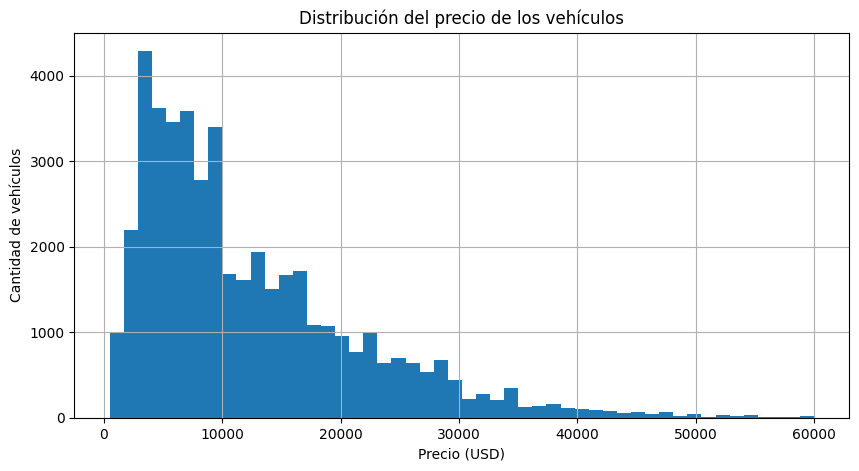

In [216]:
import matplotlib.pyplot as plt

# Histograma de precios (sin valores atípicos)
df['price'].hist(bins=50, figsize=(10, 5))
plt.title('Distribución del precio de los vehículos')
plt.xlabel('Precio (USD)')
plt.ylabel('Cantidad de vehículos')
plt.grid(True)
plt.show()

### Revisemos la columna odometer
Esto nos permitirá ver cuántos kilómetros han recorrido los vehículos en promedio y detectar posibles errores o valores atípicos.

In [217]:
#ver estadísticas básicas
df['odometer'].describe()

count     45242.000000
mean     116434.543765
std       59418.069697
min           0.000000
25%       81207.000000
50%      114000.000000
75%      147700.000000
max      990000.000000
Name: odometer, dtype: float64

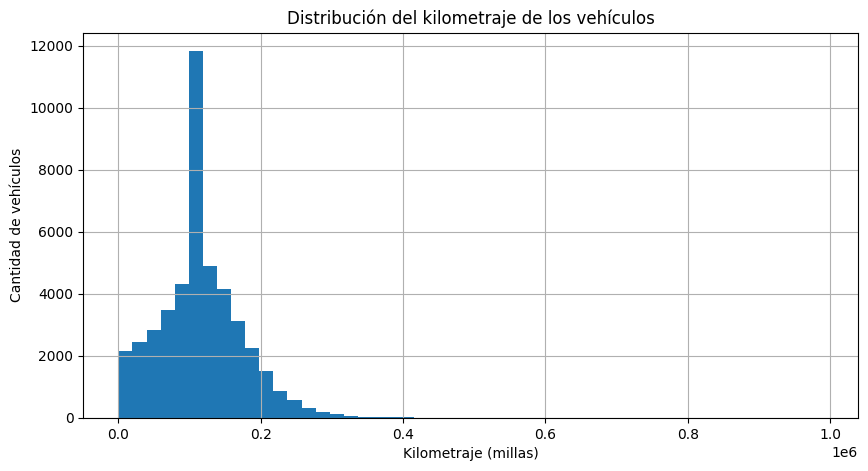

In [218]:
import matplotlib.pyplot as plt

# Histograma del odómetro
df['odometer'].hist(bins=50, figsize=(10, 5))
plt.title('Distribución del kilometraje de los vehículos')
plt.xlabel('Kilometraje (millas)')
plt.ylabel('Cantidad de vehículos')
plt.grid(True)
plt.show()

### Análisis de la columna model_year
Ahora vamos a inspeccionar los valores del año del modelo para detectar valores atípicos o errores:

In [219]:
df['model_year'].describe()

count    45242.000000
mean      2009.888577
std          6.062543
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

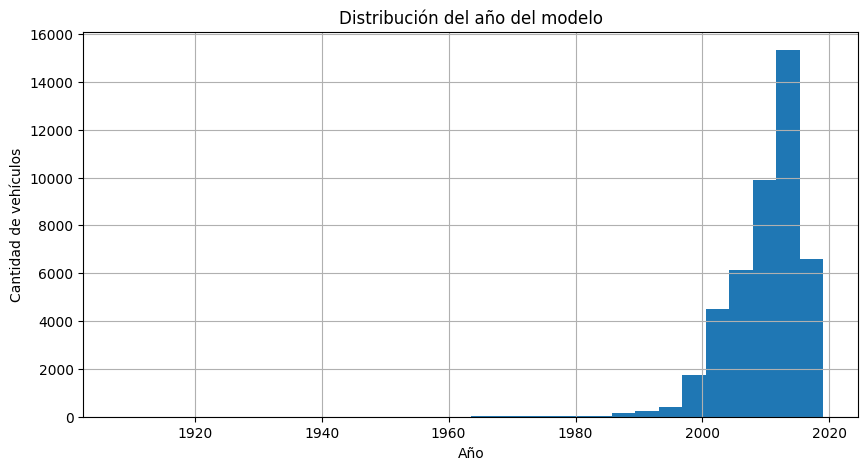

In [220]:
df['model_year'].hist(bins=30, figsize=(10, 5))
plt.title('Distribución del año del modelo')
plt.xlabel('Año')
plt.ylabel('Cantidad de vehículos')
plt.grid(True)
plt.show()

### Verifica los valores atípicos de model_year

In [221]:
df['model_year'].value_counts().sort_index()


model_year
1908.0       2
1929.0       1
1936.0       1
1948.0       1
1955.0       1
          ... 
2015.0    2880
2016.0    2553
2017.0    2036
2018.0    1704
2019.0     286
Name: count, Length: 66, dtype: int64

### Filtrar los datos
Vamos a dejar solo los vehículos fabricados a partir del año 1990, que es una fecha razonable para el análisis de autos usados actuales.

In [222]:
df = df[df['model_year'] >= 1990]

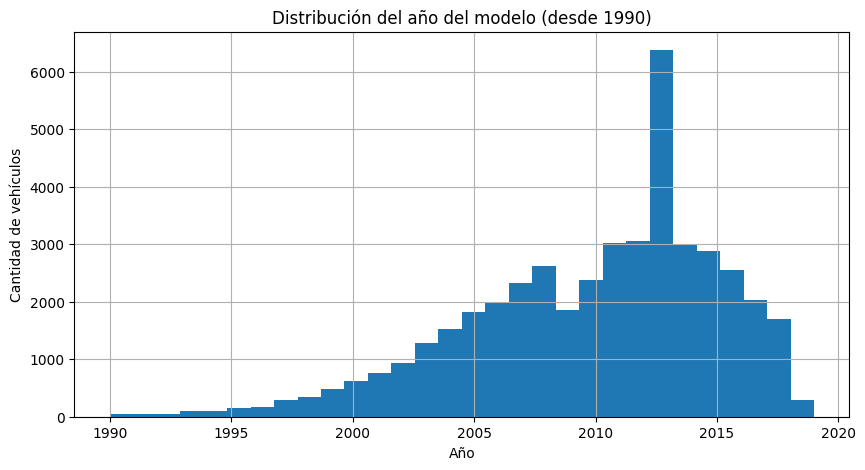

In [223]:
df['model_year'].hist(bins=30, figsize=(10, 5))
plt.title('Distribución del año del modelo (desde 1990)')
plt.xlabel('Año')
plt.ylabel('Cantidad de vehículos')
plt.show()


### Analizar la variable condition

In [224]:
df['condition'].value_counts()

condition
excellent    21187
good         17912
like new      4164
fair          1388
new            114
salvage        101
Name: count, dtype: int64

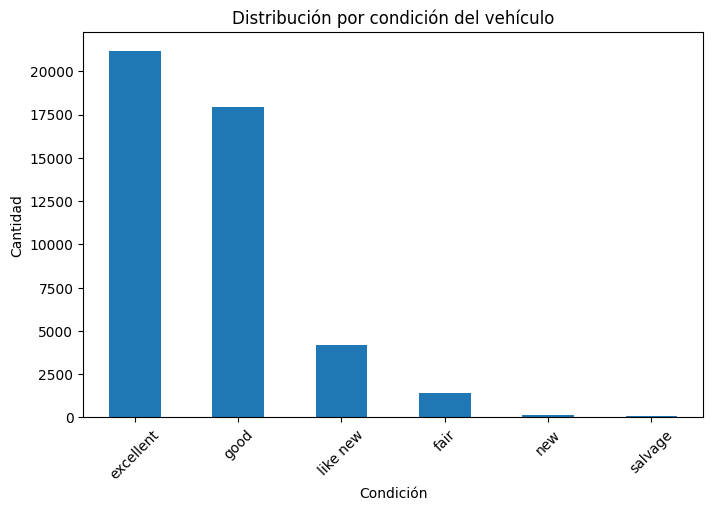

In [225]:
df['condition'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title('Distribución por condición del vehículo')
plt.xlabel('Condición')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### Tipo de vehículo (type)

In [226]:
df['type'].value_counts()

type
SUV            10864
truck          10723
sedan          10635
pickup          6195
coupe           1857
wagon           1364
mini-van        1032
hatchback        880
van              545
convertible      349
other            216
offroad          186
bus               20
Name: count, dtype: int64

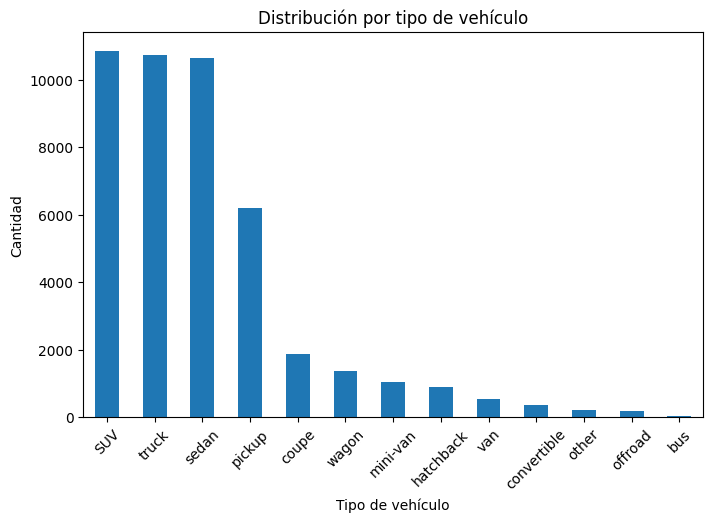

In [227]:
df['type'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title('Distribución por tipo de vehículo')
plt.xlabel('Tipo de vehículo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### Analisis transmission

In [228]:
# Conteo de valores de la columna 'transmission'
df['transmission'].value_counts()

transmission
automatic    41149
manual        2359
other         1358
Name: count, dtype: int64

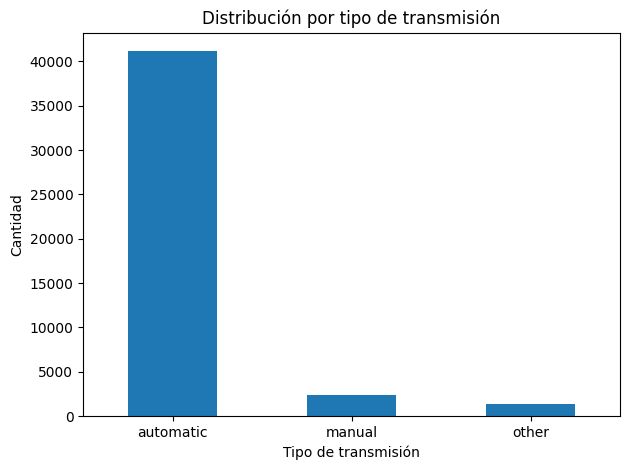

In [229]:
# Gráfico de barras para la transmisión
df['transmission'].value_counts().plot(kind='bar')
plt.title('Distribución por tipo de transmisión')
plt.xlabel('Tipo de transmisión')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Análisis de fuel

In [230]:
df['fuel'].value_counts()

fuel
gas         41105
diesel       3301
hybrid        368
other          89
electric        3
Name: count, dtype: int64

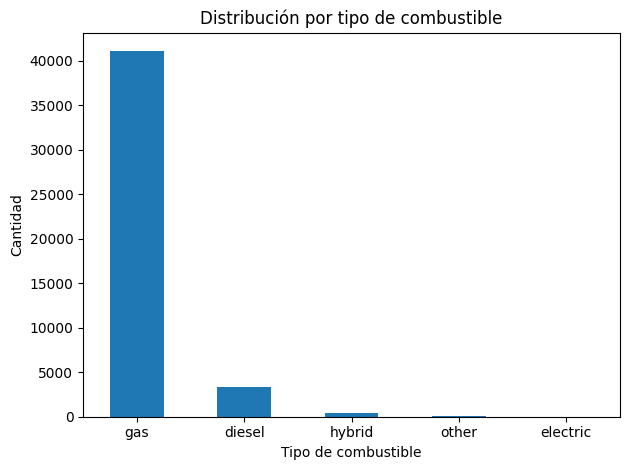

In [231]:
df['fuel'].value_counts().plot(kind='bar')
plt.title('Distribución por tipo de combustible')
plt.xlabel('Tipo de combustible')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Conteo por color

In [232]:
# Conteo de vehículos por color
df['paint_color'].value_counts()

paint_color
white      8817
unknown    8048
black      6654
silver     5427
grey       4444
blue       3904
red        3839
green      1221
brown      1062
custom      961
yellow      208
orange      194
purple       87
Name: count, dtype: int64

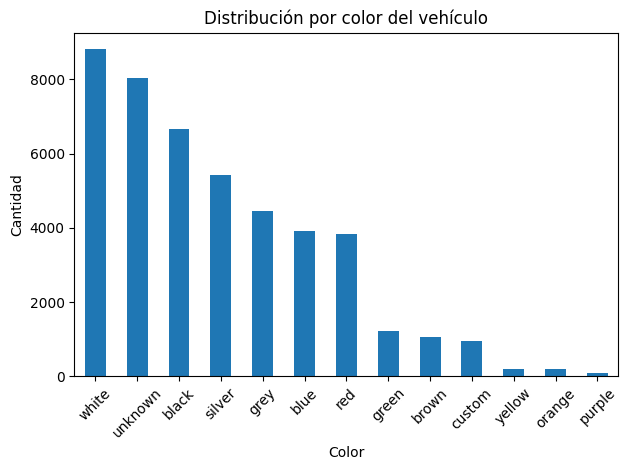

In [233]:
# Gráfico de barras para la distribución por color del vehículo
df['paint_color'].value_counts().plot(kind='bar')
plt.title('Distribución por color del vehículo')
plt.xlabel('Color')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analisis is_4wd

In [234]:
# Conteo de valores en la columna is_4wd
df['is_4wd'].value_counts(dropna=False)

is_4wd
0.0    22663
1.0    22203
Name: count, dtype: int64

In [235]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [236]:
df['paint_color'].value_counts()

paint_color
white      8817
unknown    8048
black      6654
silver     5427
grey       4444
blue       3904
red        3839
green      1221
brown      1062
custom      961
yellow      208
orange      194
purple       87
Name: count, dtype: int64

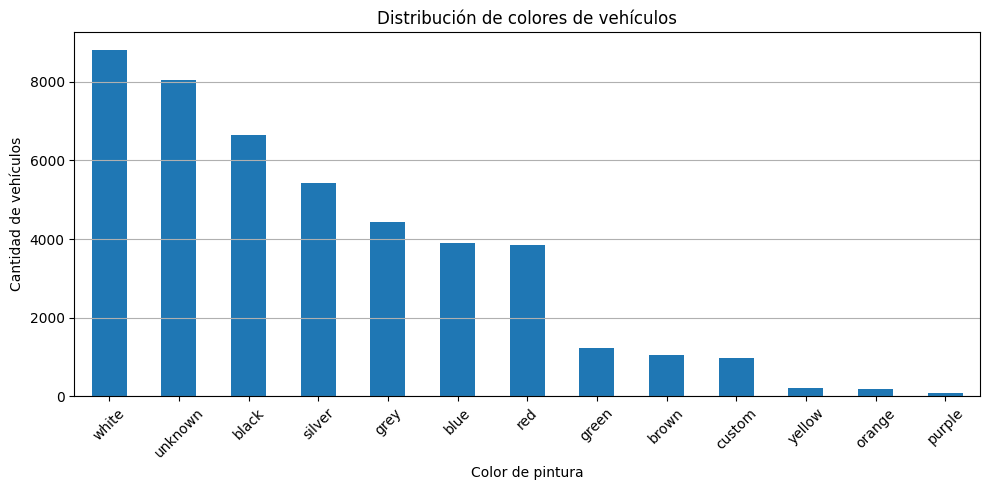

In [237]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada color
color_counts = df['paint_color'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
color_counts.plot(kind='bar')
plt.title('Distribución de colores de vehículos')
plt.xlabel('Color de pintura')
plt.ylabel('Cantidad de vehículos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Estadísticas descriptivas de days_listed

In [238]:
df['days_listed'].describe()

count    44866.000000
mean        39.573084
std         28.190085
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

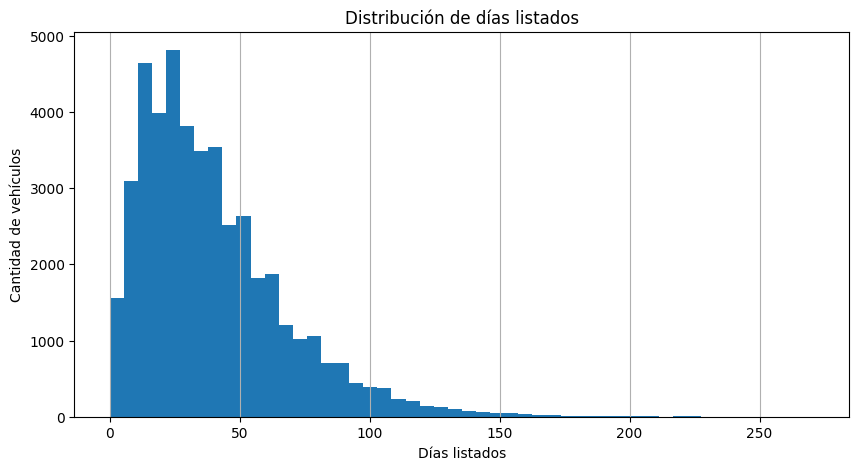

In [239]:
plt.figure(figsize=(10, 5))
df['days_listed'].hist(bins=50)
plt.title('Distribución de días listados')
plt.xlabel('Días listados')
plt.ylabel('Cantidad de vehículos')
plt.grid(axis='y')
plt.show()

### Análisis de la columna days_listed

Los datos en la columna days_listed muestran cuántos días estuvo disponible cada anuncio de venta de vehículos. A partir del análisis estadístico y el histograma generado, se pueden hacer las siguientes observaciones:

**Valor mínimo:** Algunos vehículos fueron vendidos el mismo día que se publicaron (0 días listados).

**Valor máximo:** Hay vehículos que estuvieron publicados durante un período extremadamente largo (más de 200 días). Estos son probablemente valores atípicos.

**Mediana:** Alrededor de la mitad de los anuncios se mantienen publicados por aproximadamente 33 días.

**Distribución:** El histograma muestra que la mayoría de los anuncios se agrupan entre los 20 y 50 días listados, lo que parece ser el rango típico de permanencia en la plataforma.

**Outliers:** Se observan unos pocos anuncios con valores muy altos (más de 100 o incluso 200 días), que podrían ser descartados del análisis si se decide eliminar valores extremos para mejorar la precisión.

Este análisis sugiere que los anuncios que permanecen mucho tiempo podrían estar sobrevalorados o podrían tener poca demanda. Si se desea mejorar la limpieza de los datos, se podrían eliminar los anuncios con una cantidad de días listados considerablemente mayor al promedio (por ejemplo, los que superan el percentil 95).

In [240]:
# Eliminar outliers de days_listed
# Calcular el percentil 95 de la columna days_listed
days_listed_95 = df['days_listed'].quantile(0.95)

# Filtrar el DataFrame para conservar solo los anuncios que están por debajo o igual al percentil 95
df = df[df['days_listed'] <= days_listed_95]

# Verificar el nuevo tamaño del DataFrame
print(f"Número de filas después de eliminar outliers: {df.shape[0]}")

Número de filas después de eliminar outliers: 42684


### Relación entre price y odometer

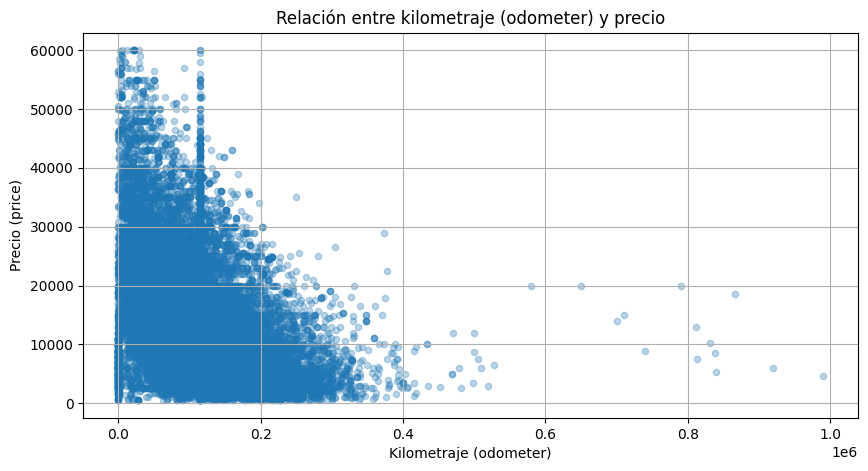

In [241]:
# Importar la librería por si no está cargada
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
df.plot(kind='scatter', x='odometer', y='price', alpha=0.3, figsize=(10, 5))

# Agregar título y etiquetas
plt.title('Relación entre kilometraje (odometer) y precio')
plt.xlabel('Kilometraje (odometer)')
plt.ylabel('Precio (price)')
plt.grid(True)

# Mostrar el gráfico
plt.show()

### Análisis:
Hay una tendencia descendente clara: a mayor kilometraje (odometer), el precio (price) tiende a disminuir.

Hay muchos vehículos agrupados entre 0 y 200,000 millas, donde se concentra la mayoría de las ventas.

También se observa una gran cantidad de vehículos de muy bajo precio sin importar el kilometraje, lo que sugiere otros factores en juego como el año, la condición o el tipo.

<Figure size 1000x500 with 0 Axes>

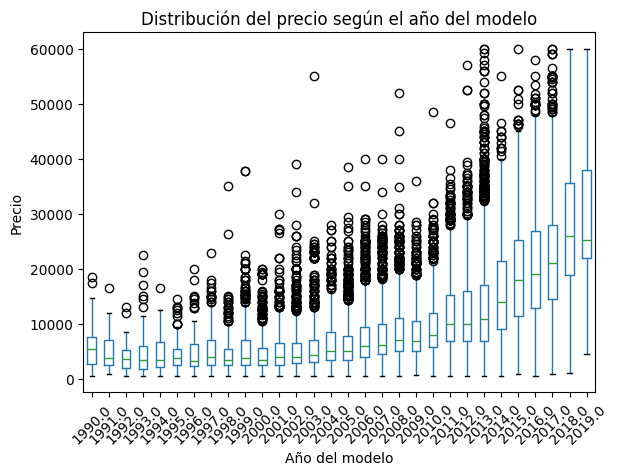

In [242]:
plt.figure(figsize=(10, 5))
df.boxplot(column='price', by='model_year', grid=False)
plt.title('Distribución del precio según el año del modelo')
plt.suptitle('')  # Oculta el título automático de seaborn
plt.xlabel('Año del modelo')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

<Figure size 800x500 with 0 Axes>

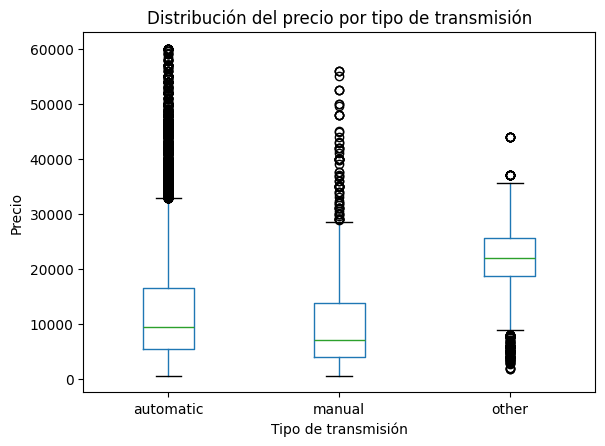

In [243]:
#Relación entre tipo de transmisión y precio
plt.figure(figsize=(8, 5))
df.boxplot(column='price', by='transmission', grid=False)
plt.title('Distribución del precio por tipo de transmisión')
plt.suptitle('')  # Oculta el título automático
plt.xlabel('Tipo de transmisión')
plt.ylabel('Precio')
plt.show()

### Relación entre tipo de transmisión y precio
El diagrama de caja muestra cómo varía el precio de los vehículos según el tipo de transmisión:

**Transmisión automática:** Es la más común y tiene una amplia dispersión de precios. El rango intercuartílico es más amplio, lo que indica mayor variabilidad.

**Transmisión manual:** Tiene precios ligeramente menores en promedio, con una concentración más densa de valores bajos. Sin embargo, también presenta valores atípicos altos.

**Other:** Aunque menos frecuente, este grupo presenta una mediana de precio más alta y menos dispersión, lo que sugiere que podrían ser vehículos especializados o de gama más alta.

**Conclusión:** La transmisión afecta el precio del vehículo. En general, los vehículos con transmisión automática y “other” tienden a tener precios más altos que los manuales.

<Figure size 1000x500 with 0 Axes>

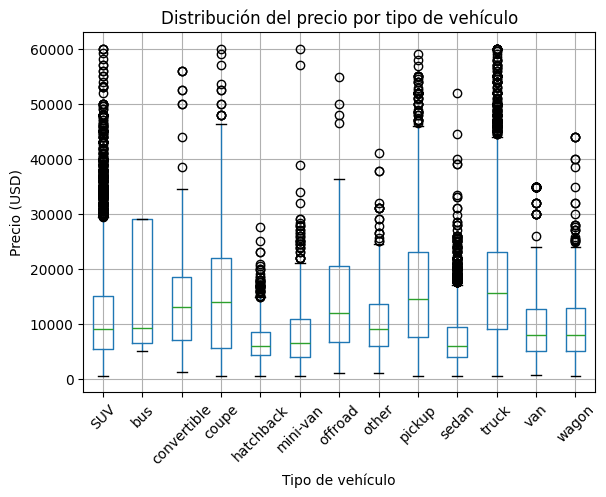

In [244]:
# Gráfico de caja: tipo de vehículo vs precio
plt.figure(figsize=(10, 5))
df.boxplot(column='price', by='type')
plt.title('Distribución del precio por tipo de vehículo')
plt.suptitle('')
plt.xlabel('Tipo de vehículo')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

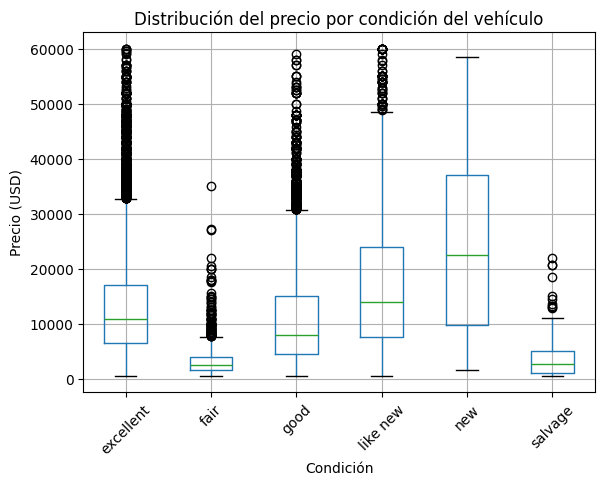

In [245]:
# Gráfico de caja: condición del vehículo vs precio
plt.figure(figsize=(10, 5))
df.boxplot(column='price', by='condition')
plt.title('Distribución del precio por condición del vehículo')
plt.suptitle('')
plt.xlabel('Condición')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 800x500 with 0 Axes>

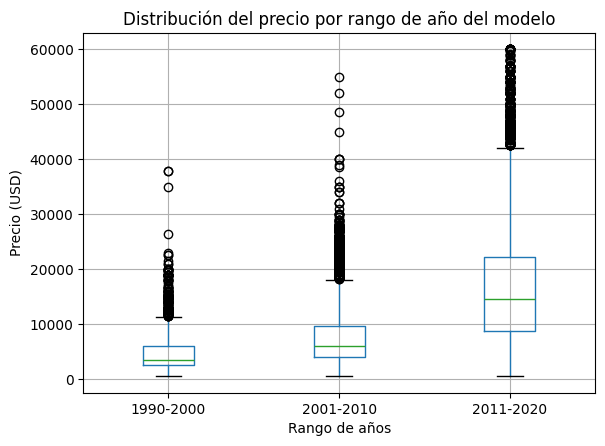

In [246]:
# Crear columna de tramos de año
bins = [1990, 2000, 2010, 2020]
labels = ['1990-2000', '2001-2010', '2011-2020']
df['year_range'] = pd.cut(df['model_year'], bins=bins, labels=labels)

# Gráfico de caja: tramo de año vs precio
plt.figure(figsize=(8, 5))
df.boxplot(column='price', by='year_range')
plt.title('Distribución del precio por rango de año del modelo')
plt.suptitle('')
plt.xlabel('Rango de años')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.show()


## Conclusiones del análisis exploratorio

- La mayoría de los vehículos listados están en condición "excellent" o "good".
- Los tipos de vehículo más comunes son SUV, sedan y pickup.
- La variable que más parece afectar el precio es el kilometraje (`odometer`) con una relación inversa clara: a mayor kilometraje, menor precio.
- También se observa una diferencia de precios entre tipos de transmisión y tipo de vehículo.
- Existen valores atípicos (outliers) tanto en el precio como en el kilometraje. Algunos vehículos con precios extremadamente altos o kilometrajes superiores a 400.000 millas deberían tratarse o eliminarse para evitar sesgos.